<a href="https://colab.research.google.com/github/cardavid11/tensorflow_certification/blob/main/gradients_and_automatic_differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Introduction to gradients and automatic differentiation
import tensorflow as tf
x = tf.Variable(3.0)
with tf.GradientTape() as tape:
  y = x**2
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [24]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]
print(w)
print(b)
print(x)
print('-----')
with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b
  loss = tf.reduce_mean(y**2)
  print(loss)
  print('-----')
  print(tape.gradient(loss, w))
  print(tape.gradient(loss, b))
  print('-----')
[dl_dw, dl_db] = tape.gradient(loss, [w, b])
print(w.shape)
print(dl_dw.shape)
print(dl_db.shape)

<tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.03332531, -1.4940906 ],
       [-0.4354946 ,  1.384409  ],
       [-0.07757045,  0.37305143]], dtype=float32)>
<tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>
[[1.0, 2.0, 3.0]]
-----
tf.Tensor(3.5117488, shape=(), dtype=float32)
-----
tf.Tensor(
[[-1.1370258  2.3938818]
 [-2.2740517  4.7877636]
 [-3.4110775  7.1816454]], shape=(3, 2), dtype=float32)
tf.Tensor([-1.1370258  2.3938818], shape=(2,), dtype=float32)
-----
(3, 2)
(3, 2)
(2,)


In [25]:
my_vars = {
    'w': w,
    'b': b
}

grad = tape.gradient(loss, my_vars)
grad['b']

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-1.1370258,  2.3938818], dtype=float32)>

In [17]:
# reduce_mean
x = tf.constant([[1., 1.], [2., 2.]])
tf.reduce_mean(x)

<tf.Tensor: shape=(), dtype=float32, numpy=1.5>

In [18]:
tf.reduce_mean(x, 0)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.5, 1.5], dtype=float32)>

In [19]:
tf.reduce_mean(x, 1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

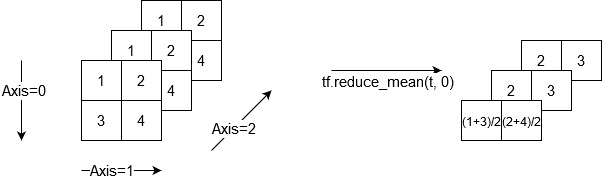

In [44]:
# Gradients with respect to a model
# Creating a Dense Layer:
# This line creates a Dense layer with 2 neurons (units) and ReLU activation function.
# A Dense layer is a fully connected neural network layer, meaning each input is connected to each neuron in this layer.
layer = tf.keras.layers.Dense(2, activation='relu')
print(layer)
# Here, x is defined as a constant tensor with shape (1, 3). It represents one data sample with three features.
x = tf.constant([[1., 2., 3.]])

_ = layer(x)  # This step is necessary to initialize the layer's weights

# Access the weights and biases
weights = layer.kernel.numpy()
biases = layer.bias.numpy()

print("Weights (W):", weights)
print("Biases (b):", biases)

with tf.GradientTape() as tape:
  # Forward pass
  # This line performs a forward pass of the input x through the Dense layer.
  # The Dense layer will perform the following operation: y = ReLU(x * W + b), where W is the weights matrix, b is the bias vector, and ReLU is the activation function.
  # Since x is (1,  3) and the layer has 2 neurons, W should be (3, 2), and b should be (2,). The output y will have the shape (1, 2).
  y = layer(x)
  # This computes the mean squared value of y, essentially squaring each element of y and then taking the average. It's a simple way to create a scalar loss value.
  loss = tf.reduce_mean(y**2)

# Calculate gradients with respect to every trainable variable
# This calculates the gradients of loss with respect to the layer's trainable variables (weights W and biases b).
grad = tape.gradient(loss, layer.trainable_variables)

Weights (W): [[ 0.4759171  -0.70771676]
 [ 0.45931995 -0.7635919 ]
 [-0.73615813  0.13242328]]
Biases (b): [0. 0.]


In [45]:
print("grad")
grad

grad


[<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[0., 0.],
        [0., 0.],
        [0., 0.]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 0.], dtype=float32)>]

In [46]:
print("layer.trainable_variables")
layer.trainable_variables

layer.trainable_variables


[<tf.Variable 'dense_9/kernel:0' shape=(3, 2) dtype=float32, numpy=
 array([[ 0.4759171 , -0.70771676],
        [ 0.45931995, -0.7635919 ],
        [-0.73615813,  0.13242328]], dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

In [47]:
# The for loop iterates over the layer's trainable variables and their corresponding gradients.
for var, g in zip(layer.trainable_variables, grad):
  # var.name gives the name of the variable (either weights or biases).
  # g.shape provides the shape of the gradient tensor for each variable. The gradient shape matches the shape of the corresponding variable:
  # The gradient of the loss with respect to W (dl/dW) will have the same shape as W, which is (3, 2).
  # The gradient with respect to b (dl/db) will have the same shape as b, which is (2,)
  print(f'{var.name}, shape: {g.shape}')

# Summary
# This code snippet demonstrates a basic forward pass through a single dense layer
# of a neural network, followed by the computation of gradients (backpropagation)
# using TensorFlow's automatic differentiation mechanism (tf.GradientTape).
# It highlights how to calculate and access the gradients of a loss function with
# respect to the model's parameters, which is a fundamental part of
# training neural networks.

dense_9/kernel:0, shape: (3, 2)
dense_9/bias:0, shape: (2,)


Controlling what the tape watches
The default behavior is to record all operations after accessing a trainable tf.Variable. The reasons for this are:

The tape needs to know which operations to record in the forward pass to calculate the gradients in the backwards pass.
The tape holds references to intermediate outputs, so you don't want to record unnecessary operations.
The most common use case involves calculating the gradient of a loss with respect to all a model's trainable variables.
For example, the following fails to calculate a gradient because the tf.Tensor is not "watched" by default, and the tf.Variable is not trainable:

In [48]:
# Controlling what the tape watches
# A trainable variable
x0 = tf.Variable(3.0, name='x0')
# Not trainable
x1 = tf.Variable(3.0, name='x1', trainable=False)
# Not a Variable: A variable + tensor returns a tensor.
x2 = tf.Variable(2.0, name='x2') + 1.0
# Not a variable
x3 = tf.constant(3.0, name='x3')

with tf.GradientTape() as tape:
  y = (x0**2) + (x1**2) + (x2**2)

grad = tape.gradient(y, [x0, x1, x2, x3])

for g in grad:
  print(g)

tf.Tensor(6.0, shape=(), dtype=float32)
None
None
None


In [49]:
# You can list the variables being watched by the tape using the GradientTape.watched_variables method:
[var.name for var in tape.watched_variables()]

['x0:0']

In [51]:
# tf.GradientTape provides hooks that give the user control over what is or is not watched.

# To record gradients with respect to a tf.Tensor, you need to call GradientTape.watch(x):

x = tf.constant(3.0)
with tf.GradientTape() as tape:
  tape.watch(x)
  y = x**2

# dy = 2x * dx
dy_dx = tape.gradient(y, x)
print(dy_dx.numpy())

6.0


In [56]:
x = tf.Variable(2.0)
with tf.GradientTape() as tape:
  y0 = x**2
  y1 = 1 / x

print(tape.gradient({'y0': y0, 'y1': y1}, x).numpy())

3.75
